# E-learning. Анализ завершенных уроков

## Описание данных

### assessments.csv
Файл содержит информацию об оценках в тесте. Обычно каждый предмет в семестре включает ряд тестов с оценками, за которыми следует заключительный экзаменационный тест (экзамен).

    code_module — идентификационный код предмета.

    code_presentation — семестр (Идентификационный код).

    id_assessment — тест (Идентификационный номер ассессмента).

    assessment_type — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).

    date — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).

    weight — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.

### courses.csv
Файл содержит список предметов по семестрам.

    code_module — предмет (идентификационный код).

    code_presentation — семестр (идентификационный код).

    module_presentation_length — продолжительность семестра в днях.

### studentRegistration.csv
Файл содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре.

    code_module — предмет (идентификационный код).

    code_presentation — семестр (идентификационный код)

    id_student — идентификационный номер студента.

    date_registration — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).

    date_unregistration — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

### studentAssessment.csv
Файл содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.
   
        id_assessment — тест (идентификационный номер).

        id_student — идентификационный номер студента.

        date_submitted — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.

        is_banked — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).

        score — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

## Импорт библиотек и загрузка данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(
    font_scale =1,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,7)}
)

In [5]:
assessments = pd.read_csv('assessments.csv')

In [4]:
courses = pd.read_csv('courses.csv')

In [6]:
student_registration = pd.read_csv('studentRegistration.csv')

In [7]:
student_assessment = pd.read_csv('studentAssessment.csv')

## Подготовка данных

In [8]:
assessments.info() # есть пропуски в данных об окончательной дате сдачи теста.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [9]:
assessments.query('date == "NaN"').assessment_type.unique()
# пропущенные значения относятся к испытаниям типа "Exam".
# В этом случае пропуски можно заменить датой окончания курса из courses.

array([], dtype=object)

In [10]:
courses.info()#пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 660.0+ bytes


In [11]:
assessments_extended = assessments.merge(right = courses, how = 'left', on = ['code_module', 'code_presentation'])

In [12]:
assessments_extended.date = assessments_extended.date.fillna(assessments_extended.module_presentation_length)

In [13]:
assessments_extended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 206 non-null    object 
 1   code_presentation           206 non-null    object 
 2   id_assessment               206 non-null    int64  
 3   assessment_type             206 non-null    object 
 4   date                        206 non-null    float64
 5   weight                      206 non-null    float64
 6   module_presentation_length  206 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 11.4+ KB


In [14]:
student_registration.info()
# пропуски в данных о дате регистрации.Факт отсутствия даты рагистрации считается как отсутствие регистрации.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [15]:
student_assessment.info()
#пропуски в оценках

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


В числе сдающих экзамены студентов не должно быть незарегистрированных студентов.
После добавления информации о регистрации в таблицу *student_assessment*, записи с пропусками в дате регистрации удаляются.

In [16]:
student_assessment_extended = student_assessment.merge(right=assessments_extended,how='left', on='id_assessment')

In [17]:
student_assessment_extended = student_assessment_extended.merge(right=student_registration,how='left', on=['id_student','code_module','code_presentation'])

In [18]:
student_assessment_extended = student_assessment_extended.dropna(subset=['date_registration'])

Записи со сдачей теста после отмены регистрации не анализируются:

In [19]:
to_drop = student_assessment_extended.query('date_submitted > date_unregistration').index

In [20]:
student_assessment_extended = student_assessment_extended.drop(index = to_drop)

In [21]:
student_assessment_extended.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173311 entries, 0 to 173911
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id_assessment               173311 non-null  int64  
 1   id_student                  173311 non-null  int64  
 2   date_submitted              173311 non-null  int64  
 3   is_banked                   173311 non-null  int64  
 4   score                       173153 non-null  float64
 5   code_module                 173311 non-null  object 
 6   code_presentation           173311 non-null  object 
 7   assessment_type             173311 non-null  object 
 8   date                        173311 non-null  float64
 9   weight                      173311 non-null  float64
 10  module_presentation_length  173311 non-null  int64  
 11  date_registration           173311 non-null  float64
 12  date_unregistration         12454 non-null   float64
dtypes: float64(5), int6

In [22]:
student_assessment_extended.query('score == "NaN"')
# возможно, что оценка не засчитана из-за сдачи после срока. Пропуски составляют не более 0,1 % данных, можно удалить.

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation_length,date_registration,date_unregistration


In [23]:
student_assessment_extended = student_assessment_extended.dropna(subset=['score'])

In [24]:
student_assessment_extended.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173153 entries, 0 to 173911
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id_assessment               173153 non-null  int64  
 1   id_student                  173153 non-null  int64  
 2   date_submitted              173153 non-null  int64  
 3   is_banked                   173153 non-null  int64  
 4   score                       173153 non-null  float64
 5   code_module                 173153 non-null  object 
 6   code_presentation           173153 non-null  object 
 7   assessment_type             173153 non-null  object 
 8   date                        173153 non-null  float64
 9   weight                      173153 non-null  float64
 10  module_presentation_length  173153 non-null  int64  
 11  date_registration           173153 non-null  float64
 12  date_unregistration         12397 non-null   float64
dtypes: float64(5), int6

## Сколько студентов успешно сдали только один курс?
(Успешная сдача — это зачёт по курсу на экзамене)

Примечание:
* Под сдачей курса подразумевается прохождение курса.
* Зачет по курсу на экзамене = оценка от 40 и выше на экзамене по курсу (Exam).

Курс - это предмет, запущенный в каждом отдельном семестре.

In [26]:
student_assessment_extended['code_course'] = student_assessment_extended.code_module + '_' + student_assessment_extended.code_presentation

Во всех ли курсах предусмотрен экзамен?

In [27]:
exam = assessments.query('assessment_type == "Exam"')

In [28]:
exam.groupby(['code_module','code_presentation']).size()
#курс ССС подразумевает 2 экзамена

code_module  code_presentation
AAA          2013J                1
             2014J                1
BBB          2013B                1
             2013J                1
             2014B                1
             2014J                1
CCC          2014B                2
             2014J                2
DDD          2013B                1
             2013J                1
             2014B                1
             2014J                1
EEE          2013J                1
             2014B                1
             2014J                1
FFF          2013B                1
             2013J                1
             2014B                1
             2014J                1
GGG          2013J                1
             2014B                1
             2014J                1
dtype: int64

In [29]:
student_assessment_extended.query('assessment_type == "Exam"') \
    .groupby(['code_course','id_assessment'], as_index=False) \
    .size() \
    .rename(columns={'size':'number of exams'})
# Студенты сдавали экзамены только по предметам CCC и DDD.
# Причем по предмету ССС в каждом курсе сдавался только один экзамен из двух предусмотренных.
# Предполагаю, что 2 экзамена в таблице с видами тестирования - это 2 возможных варианта экзамена
# и второй вариант студентам просто не предлагался, а для прохождения курса достаточно пройти один из них.

,code_course,id_assessment,number of exams
0,CCC_2014B,24290,747
1,CCC_2014J,24299,1168
2,DDD_2013B,25340,602
3,DDD_2013J,25354,967
4,DDD_2014B,25361,524
5,DDD_2014J,25368,950


In [30]:
successful_exam = student_assessment_extended.query('assessment_type == "Exam" & score >= 40 ')

In [31]:
successful_exam.groupby('id_student',as_index=False).size().id_student.nunique()
# все студенты успешно окончившие курсы.

4097

In [32]:
successful_exam.groupby('id_student',as_index=False).size().query('size == 1').id_student.nunique()
# студенты успешно окончившие только 1 курс.

3802

In [33]:
students_one_successful_exam = successful_exam.groupby('id_student',as_index=False).size().query('size == 1').id_student.unique()

Из 4097 студентов успешно окончивших курсы только 3802 окончили только 1 курс.

## Самый сложный и самый простой экзамен:
найти курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*

                *завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

Примечание:
* Так как в данном исследовании на каждый курс приходится один экзамен, то задача будет состоять в поиске предметов (AAA, BBB...) и экзаменов в рамках одного предмета с самой низкой и самой высокой завершаемостью.
* Из предыдущей задачи стало понятно, что данные о сдаче именно экзаменов (Exam) есть только для предметов CCC и DDD, что говорит о том, что остальные предметы обладают либо нулевой завершаемостью, либо недостаточным сбором данных. В любом случае, предметы, по которым отсутствуют данные о сдаче экзаменов, в данной задаче не рассматриваются.
    

In [34]:
N_of_attempts = student_assessment_extended.query('assessment_type == "Exam"').groupby('id_assessment',as_index=False).size().rename(columns={'size':'n_of_attempts'})

In [35]:
N_of_attempts # кол-во всех попыток сдать экзамен

,id_assessment,n_of_attempts
0,24290,747
1,24299,1168
2,25340,602
3,25354,967
4,25361,524
5,25368,950


In [36]:
student_assessment_extended = student_assessment_extended.merge(right = N_of_attempts, how='left', on= 'id_assessment')

In [37]:
successful_Exam = student_assessment_extended.query('assessment_type == "Exam" & score >= 40')

In [38]:
successful_attemps = successful_Exam \
    .groupby('id_assessment',as_index=False) \
    .size() \
    .rename(columns={'size':'successful_attempts'})

In [39]:
successful_attemps # кол-во успешных экзаменов

,id_assessment,successful_attempts
0,24290,664
1,24299,1019
2,25340,504
3,25354,878
4,25361,485
5,25368,842


In [40]:
attemps = N_of_attempts.merge(right = successful_attemps, how='left', on= 'id_assessment')

In [41]:
attemps['complition'] = round((attemps.successful_attempts / attemps.n_of_attempts)*100)
# расчет замершаемости

In [42]:
attemps = attemps.merge(right = assessments_extended, how='left', on= 'id_assessment')
attemps = attemps.drop(columns=['assessment_type', 'date','weight','module_presentation_length'])
# добавление информации об экзаменах

In [43]:
attemps.query('complition == complition.min()')
# Экзамен с самой низкой замершаемостью = самый сложный экзамен

,id_assessment,n_of_attempts,successful_attempts,complition,code_module,code_presentation
2,25340,602,504,84.0,DDD,2013B


In [44]:
attemps.query('complition == complition.max()')
# Экзамен с самой высокой замершаемостью = самый простой экзамен

,id_assessment,n_of_attempts,successful_attempts,complition,code_module,code_presentation
4,25361,524,485,93.0,DDD,2014B


In [45]:
attemps_per_module = attemps.groupby('code_module', as_index=False).agg({'n_of_attempts':'sum','successful_attempts':'sum'})

In [46]:
attemps_per_module['complition'] = round((attemps_per_module.successful_attempts / attemps_per_module.n_of_attempts)*100)
# расчет замершаемости

In [47]:
attemps_per_module

,code_module,n_of_attempts,successful_attempts,complition
0,CCC,1915,1683,88.0
1,DDD,3043,2709,89.0


Предметы CCC и DDD имеют одинаковую завершаемость курсов (перевес у DDD составляет всего 1%).

Самым сложным оказался итоговый экзамен по предмету DDD в семестре 2013B, но уже в семестре 2014B по тому же предмету экзамен стал самым простым.

## Самые популярные предметы (ТОП-3) по количеству регистраций на них, а также предметы с самым большим оттоком (ТОП-3)

In [48]:
 student_registration_corrected = student_registration.dropna(subset=['date_registration'])
 # отсутствие даты регистрации все еще рассматривается как отсутствие регистрации

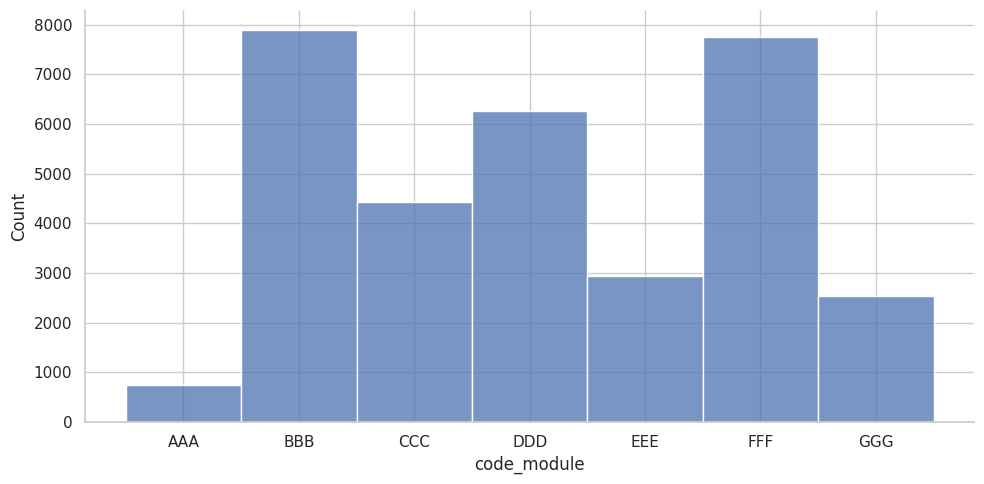

In [49]:
sns.displot(data=student_registration_corrected, x="code_module",  height= 5 , aspect= 2 )
# лидеры по количеству регистраций - предметы BBB  и FFF
# c относительно небольшим перевесом впереди BBB

In [50]:
registrations = student_registration \
    .groupby('code_module',as_index=False) \
    .size() \
    .rename(columns={'size':'number_of_registrations'})

In [51]:
TOP_registrations = registrations \
    .sort_values('number_of_registrations', ascending=False) \
    .head(3)

In [52]:
TOP_registrations

,code_module,number_of_registrations
1,BBB,7909
5,FFF,7762
3,DDD,6272


In [53]:
student_unregistration = student_registration.query('date_unregistration != "NaN"')

In [54]:
student_unregistration_by_module = student_unregistration \
    .groupby('code_module',as_index=False) \
    .size() \
    .rename(columns={'size':'number_of_unregistrations'})

In [58]:
registrations_by_module = registrations.merge(right = student_unregistration_by_module, how='left', on='code_module')

Для расчета оттока студентов необходимо число отмен нормировать на число регистраций.

In [59]:
registrations_by_module['Churn'] = round((registrations_by_module.number_of_unregistrations / registrations_by_module.number_of_registrations)*100)


<Axes: xlabel='code_module', ylabel='Churn'>

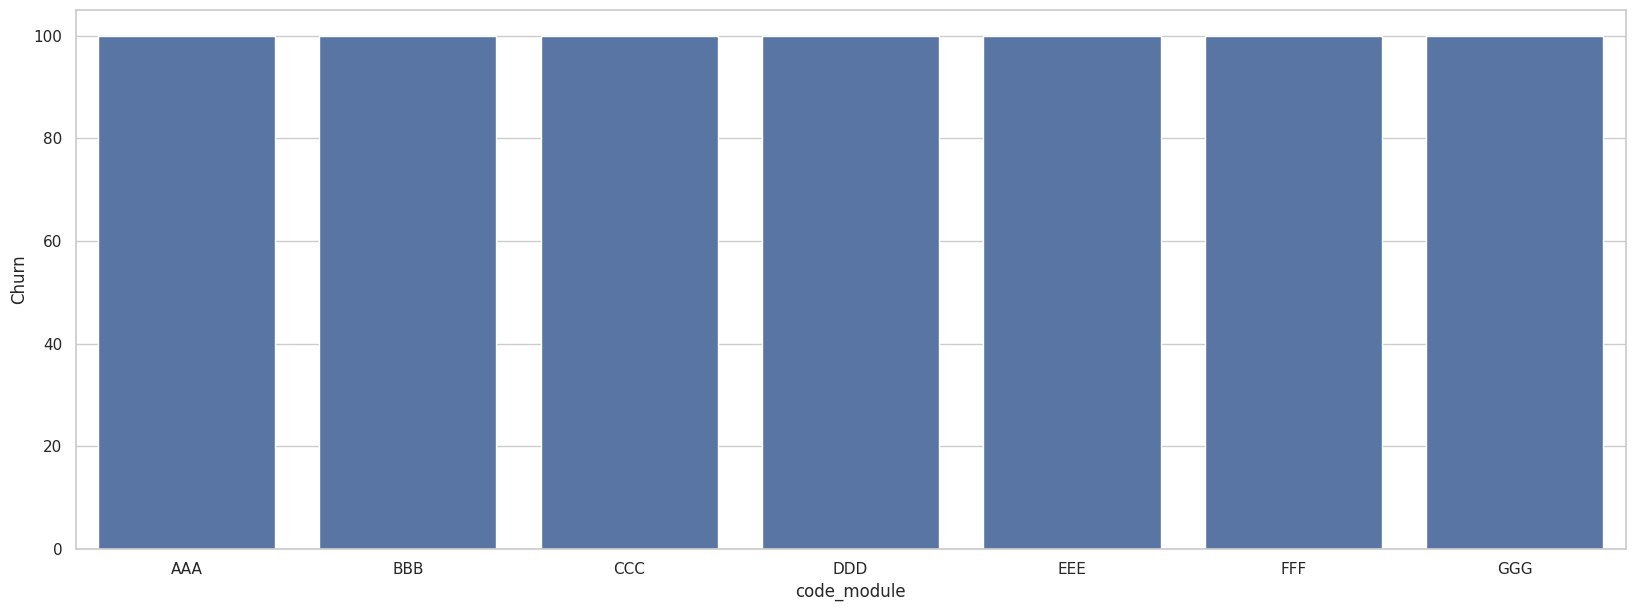

In [60]:
sns.barplot(data=registrations_by_module, x="code_module", y="Churn")

In [61]:
TOP_Churn = registrations_by_module.sort_values('Churn', ascending=False).drop(columns=['number_of_registrations','number_of_unregistrations']).head(3)

In [62]:
TOP_Churn

,code_module,Churn
0,AAA,100.0
1,BBB,100.0
2,CCC,100.0


Наибольшей популярностью у студентов пользуются предметы BBB, FFF и DDD.

Причем лидер по числу регистраций не вошел в антирейтинг предметов, составленный по числу отмен регистрации.

Самый высокий процент оттока студентов на курсe CCC - 44%.

## Cеместр с самой низкой завершаемостью курсов  (в период с начала 2013 по конец 2014).

In [63]:
N_of_attempts_by_presentation = student_assessment_extended \
    .query('assessment_type == "Exam"') \
    .groupby('code_presentation',as_index=False) \
    .size() \
    .rename(columns={'size':'n_of_attempts'})
# Расчет количества попыток сдать экзамен в каждом семестре

In [64]:
N_of_attempts_by_presentation

,code_presentation,n_of_attempts
0,2013B,602
1,2013J,967
2,2014B,1271
3,2014J,2118


In [65]:
successful_attemps_by_presentation = successful_Exam \
    .groupby('code_presentation',as_index=False) \
    .size() \
    .rename(columns={'size':'successful_attempts'})
# Расчет количества успешных попыток сдать экзамен в каждом семестре

In [66]:
successful_attemps_by_presentation

,code_presentation,successful_attempts
0,2013B,504
1,2013J,878
2,2014B,1149
3,2014J,1861


In [67]:
attemps_by_presentation = N_of_attempts_by_presentation.merge(right = successful_attemps_by_presentation, how='left', on= 'code_presentation')

In [68]:
attemps_by_presentation['complition'] = round((attemps_by_presentation.successful_attempts / attemps_by_presentation.n_of_attempts)*100)
# расчет замершаемости

In [69]:
attemps_by_presentation.sort_values('complition')


,code_presentation,n_of_attempts,successful_attempts,complition
0,2013B,602,504,84.0
3,2014J,2118,1861,88.0
2,2014B,1271,1149,90.0
1,2013J,967,878,91.0


Cамая низкая завершаемость курсов в семестре "2013B"

## RFM-кластеры студентов
Адаптация кластеризации:

    R - среднее время сдачи одного экзамена,
    F - завершаемость курсов,
    M - среднее количество баллов, получаемое за экзамен.


In [71]:
student_exams = student_assessment_extended.query('assessment_type == "Exam"')
# для анализа отбираются студенты сдававшие экзамены

### Recency (среднее время сдачи одного экзамена)
Время сдачи экзамена = за сколько дней до дедлайна сдан экзамен

In [74]:
student_exams.head(2)

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation_length,date_registration,date_unregistration,code_course,n_of_attempts
52715,24290,558914,230,0,32.0,CCC,2014B,Exam,241.0,100.0,241,-74.0,NaN,CCC_2014B,747.0
52716,24290,559706,234,0,78.0,CCC,2014B,Exam,241.0,100.0,241,-22.0,NaN,CCC_2014B,747.0


In [75]:
recency = student_exams \
    .groupby('id_student', as_index=False) \
    .agg({'date_submitted': 'mean'}) \
    .rename(columns={'date_submitted':'recency'})

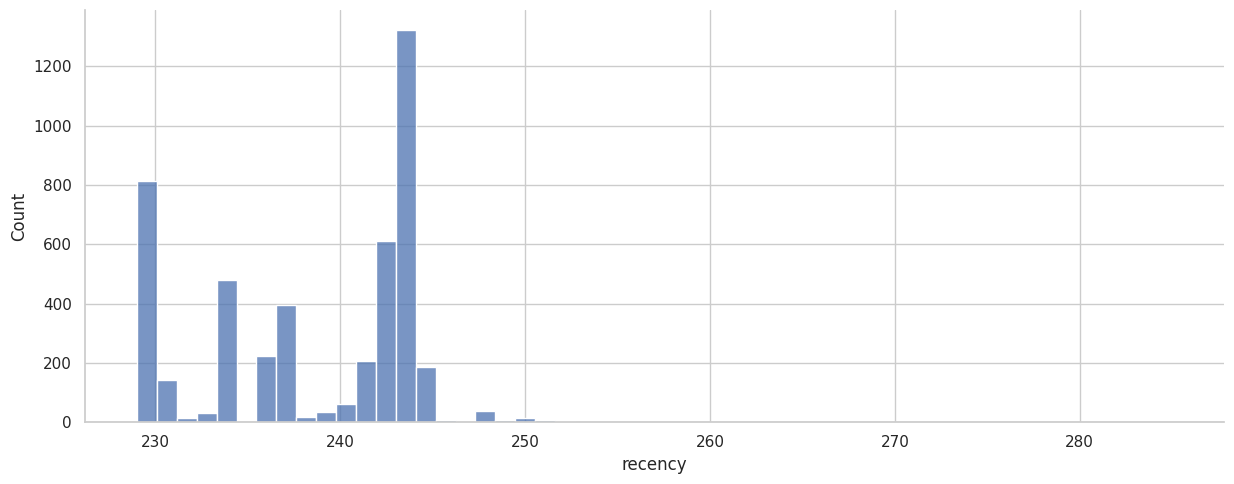

In [76]:
sns.displot(data=recency, x="recency",  height= 5 , aspect= 2.5 )

In [77]:
recency.recency.describe()

,recency
count,4632.000000
mean,238.462543
std,5.653948
min,229.000000
25%,234.000000
50%,241.000000
75%,243.000000
max,285.000000


Большинство студентов сдают экзамены за 234 - 243 дней.
Можно объединить этих студентов в группу "средние сроки сдачи экзамена".
Тогда границы метрики recency будут выглядеть следующим образом:

1. recency > 243 : любители острых ощущений с риском не уложиться в дедлайны,

2. 234 <= recency <= 243 : студенты с планомерным подходом к сдаче экзамена,

3. recency < 234 : передовики

### Frequency (завершаемость курсов)

In [78]:
N_of_attempts_per_student = student_exams \
    .groupby('id_student',as_index=False) \
    .size() \
    .rename(columns={'size':'n_of_attempts_per_student'})
 # количество всех попыток сдать экзамен у каждого студента

In [79]:
student_successful_exams = student_exams \
    .query('score >= 40') \
    .groupby('id_student',as_index=False) \
    .size() \
    .rename(columns={'size':'n_of_successful_attempts_per_student'})
 # количество успешных попыток сдать экзамен у каждого студента

In [80]:
student_successful_exams

,id_student,n_of_successful_attempts_per_student
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1
...,...,...
4092,2694886,1
4093,2694933,1
4094,2695608,1
4095,2697181,1


In [81]:
frequency = N_of_attempts_per_student.merge(right = student_successful_exams, how='left', on= 'id_student')

In [82]:
frequency = frequency.fillna(0)

In [83]:
frequency['frequency'] = round((frequency.n_of_successful_attempts_per_student / frequency.n_of_attempts_per_student)*100)
# расчет замершаемости

In [84]:
frequency = frequency.drop(columns=['n_of_attempts_per_student','n_of_successful_attempts_per_student'])

In [85]:
frequency.frequency.unique()

array([100.,   0.,  50.])

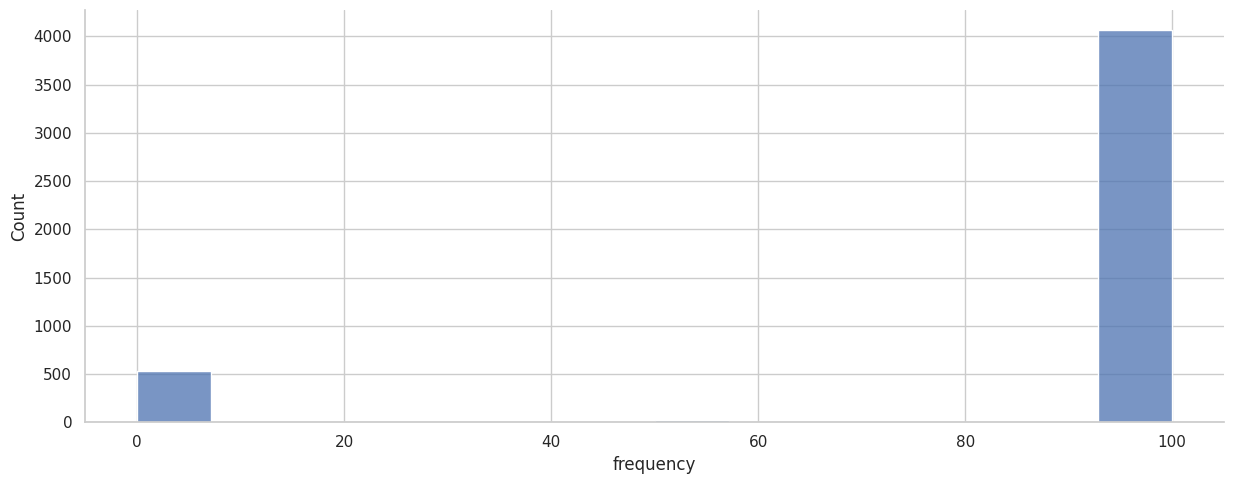

In [86]:
sns.displot(data=frequency, x="frequency",  height= 5 , aspect= 2.5 )

Завершаемость курсов каждым студентом принимает только 3 значения:
1. 0% : все попытки неуспешные,
2. 50% - только половина попыток успешные,
3. 100% - все попытки сдачи экзаменов успешные.

Большинство студентов справляются с итоговым экзаменом.

### Monetary (среднее количество баллов, получаемое за экзамен)

In [87]:
monetary = student_exams \
    .groupby('id_student',as_index=False) \
    .agg({'score' : 'mean'}) \
    .rename(columns={'score':'monetary'}) \
    .sort_values('monetary' , ascending=False)

In [88]:
monetary

,id_student,monetary
3684,674965,100.0
2597,602042,100.0
1344,524128,100.0
36,53300,100.0
28,49119,100.0
...,...,...
492,338034,7.0
4528,2588543,4.0
75,81351,0.0
1735,556660,0.0


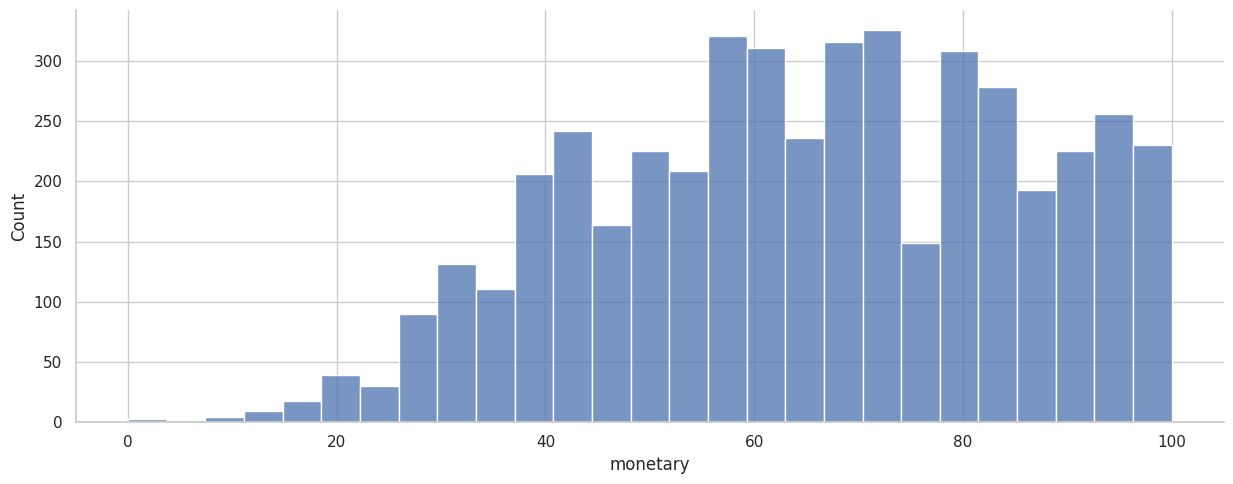

In [89]:
sns.displot(data=monetary, x="monetary",  height= 5 , aspect= 2.5 )

In [90]:
monetary.monetary.describe()

,monetary
count,4632.000000
mean,65.124892
std,20.467329
min,0.000000
25%,50.000000
50%,66.000000
75%,82.000000
max,100.000000


Большинство студентов получают оценки в интервале от 50 до 82.
Можно объединить этих студентов в группу "средние оценки", но с изменением нижней границы на 40 (пороговое значение сдачи экзамена).
Тогда границы метрики monetary будут выглядеть следующим образом:
1. monetary < 40 : Двоечники
2. 40 <= monetary <= 82 : Хорошисты
3. monetary > 82 : Отличники

In [91]:
rfm = recency.merge(right=frequency, how='left', on='id_student')
# объединение метрик в одну таблицу

In [92]:
rfm = rfm.merge(right=monetary, how='left', on='id_student')
# объединение метрик в одну таблицу

In [93]:
rfm

,id_student,recency,frequency,monetary
0,23698,243.0,100.0,80.0
1,24213,236.0,100.0,58.0
2,27116,243.0,100.0,96.0
3,28046,237.0,100.0,40.0
4,28787,243.0,100.0,44.0
...,...,...,...,...
4627,2694886,236.0,100.0,69.0
4628,2694933,230.0,100.0,73.0
4629,2695608,237.0,100.0,73.0
4630,2697181,230.0,100.0,80.0


In [94]:
quintiles = rfm[['recency', 'monetary']].quantile([.25, .75]).to_dict()
quintiles

{'recency': {0.25: 234.0, 0.75: 243.0}, 'monetary': {0.25: 50.0, 0.75: 82.0}}

In [95]:
def r_score(x):
    if x < quintiles['recency'][.25]:
        return 3
    elif x <= quintiles['recency'][.75]:
        return 2
    else:
        return 1

def f_score(x):
    if x == 0:
        return 1
    elif x <= 50:
        return 2
    else:
        return 3

def m_score(x):
    if x < 40:
        return 1
    elif x <= quintiles['monetary'][.75]:
        return 2
    else:
        return 3

In [96]:
rfm

,id_student,recency,frequency,monetary
0,23698,243.0,100.0,80.0
1,24213,236.0,100.0,58.0
2,27116,243.0,100.0,96.0
3,28046,237.0,100.0,40.0
4,28787,243.0,100.0,44.0
...,...,...,...,...
4627,2694886,236.0,100.0,69.0
4628,2694933,230.0,100.0,73.0
4629,2695608,237.0,100.0,73.0
4630,2697181,230.0,100.0,80.0


In [97]:
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: f_score(x))
rfm['M'] = rfm['monetary'].apply(lambda x: m_score(x))

In [98]:
rfm['RFM_score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,id_student,recency,frequency,monetary,R,F,M,RFM_score
0,23698,243.0,100.0,80.0,2,3,2,232
1,24213,236.0,100.0,58.0,2,3,2,232
2,27116,243.0,100.0,96.0,2,3,3,233
3,28046,237.0,100.0,40.0,2,3,2,232
4,28787,243.0,100.0,44.0,2,3,2,232


<Axes: xlabel='RFM_score', ylabel='count'>

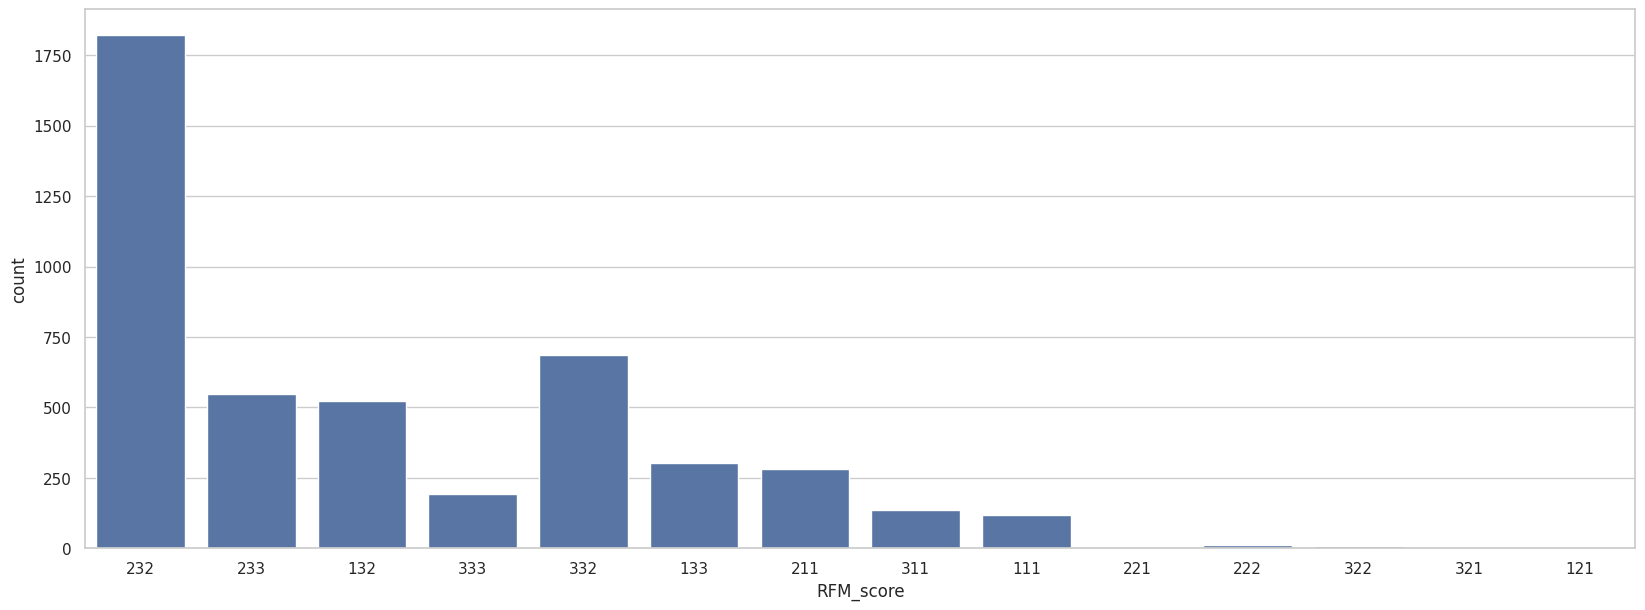

In [99]:
sns.countplot(x=rfm.RFM_score)

In [100]:
rfm_segments = rfm \
    .groupby('RFM_score', as_index=False) \
    .agg({'id_student':'count'}) \
    .rename(columns={'id_student':'number of students'})

In [101]:
rfm_segments.sort_values('RFM_score').RFM_score.unique()

array(['111', '121', '132', '133', '211', '221', '222', '232', '233',
       '311', '321', '322', '332', '333'], dtype=object)

In [102]:
segments = {'RFM_score': ['111', '122', '132', '133', '211', '221', '222', '232', '233','311', '321', '322', '332', '333'], 'Segment': ['Неуспевающие', 'Трудности со сдачей', 'Хорошисты', 'Отличники', 'Неуспевающие', 'Минимум знаний', 'Трудности со сдачей', 'Хорошисты', 'Отличники',
       'Неуспевающие', 'Минимум знаний', 'Трудности со сдачей', 'Хорошисты', 'Отличники']}
segments = pd.DataFrame(data=segments)
segments
# Сегментация укрупнена для демонстрации общей картины.
# При необходимости можно каждый укрупненный сегмент рассмотреть более детально.

,RFM_score,Segment
0,111,Неуспевающие
1,122,Трудности со сдачей
2,132,Хорошисты
3,133,Отличники
4,211,Неуспевающие
5,221,Минимум знаний
6,222,Трудности со сдачей
7,232,Хорошисты
8,233,Отличники
9,311,Неуспевающие


In [103]:
students_segment = rfm.merge(right = segments, how='left', on='RFM_score')

<Axes: xlabel='Segment', ylabel='count'>

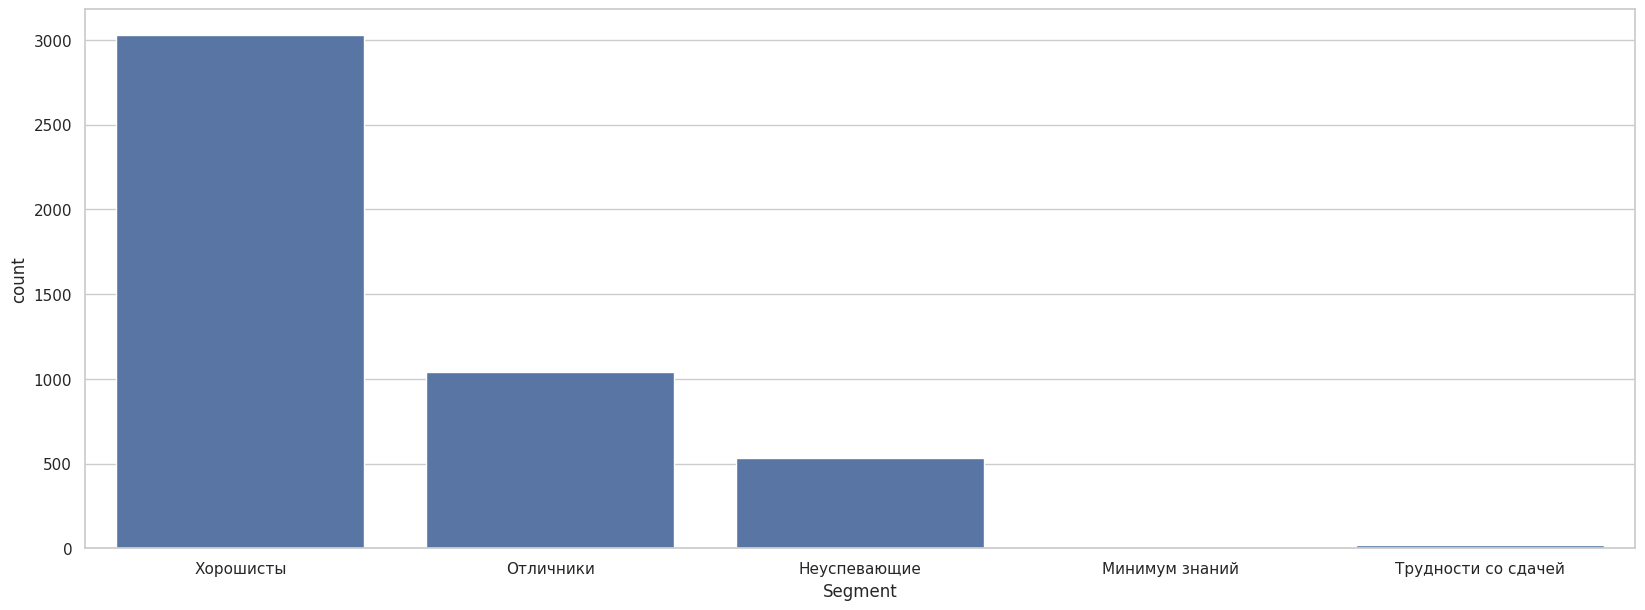

In [104]:
sns.countplot(x=students_segment.Segment)

In [105]:
(students_segment.query('Segment == "Минимум знаний"').Segment.count() / students_segment.Segment.count())*100

np.float64(0.1295616497516735)

In [106]:
(students_segment.query('Segment == "Трудности со сдачей"').Segment.count() / students_segment.Segment.count())*100

np.float64(0.45346577413085726)

In [107]:
(students_segment.query('Segment == "Неуспевающие"').Segment.count() / students_segment.Segment.count())*100

np.float64(11.552580436190887)

Студенты, оканчивающие курс с минимумом знаний (сдача не с первого раза и с минимальной проходной оценкой) составляют 0,13%.

Студенты, испытывающие трудности со сдачей экзаменов (сдача не с первого раза) составляют 0,45%.

Неуспевающие студенты - 11,55% аудитории. Возможно стоит применить методы перевода студентов из категории неуспевающих в более успешную категорию.